# 1.Libraries & Data Import

In [34]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.io import arff
from zipfile import ZipFile
from io import BytesIO
import requests
from scipy import stats
from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score,mean_squared_error, accuracy_score
from sklearn.naive_bayes import MultinomialNB
#setting the view change
pd.set_option('display.max_columns', 500)

In [35]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"

with ZipFile(BytesIO(requests.get(url).content), "r") as myzip:

    with myzip.open("DryBeanDataset/Dry_Bean_Dataset.xlsx", "r") as f:
        df = pd.read_excel(f)

In [36]:
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

# 2.Data Exploration
- We will explore the data that we loaded from the UCI website

In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

class pre_process_standardize:
    def __init__(self,X):
        self.mean = None
        self.X = X
    def fit(self):
        self.mean = np.mean(X,axis = 0)
        self.std = np.std(self.X, axis = 0)
        return (self.X - self.mean) / self.std
    
    def transform(self,X):
        return (X - self.mean ) / self.std
    
pre_process_model = pre_process_standardize(X_train)
X_train_pre_process =  pre_process_model.fit()
X_test_pre_process = pre_process_model.transform(X_test)

data frame for analysis (df_analysis)

In [37]:
df_analysis = pd.DataFrame(X_train_pre_process, columns = df.columns[:-1])
df_analysis['Class'] = y_train

In [38]:
df_test_analysis = pd.DataFrame(X_test_pre_process, columns = df.columns[:-1])
df_test_analysis['Class'] = y_test

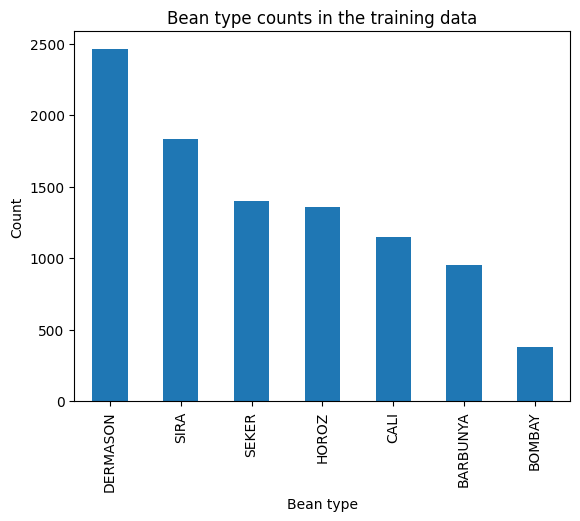

In [39]:
df_analysis["Class"].value_counts().plot(kind='bar',
                                   title= "Bean type counts in the training data",
                                   xlabel= 'Bean type',
                                   ylabel= 'Count');

There's an imbalance between the count of each class. <br>
Dermason is the most frequent class. (2496) <br>
Bombay is the least frequent class. (365) <br>
There's a big difference between the 2 classes, which should to be taken into account when building a model.

# 3.Univariate Analysis

In [12]:
#shape of X
print('Data shape:',df_analysis.shape)

#data description of X
df_table = pd.DataFrame({'Nulls': df_analysis.isna().sum(), 'Dtype': df_analysis.dtypes,"Unique" : df_analysis.nunique(),'Duplicated' : df_analysis.duplicated().sum(), 
                         'Mean': df_analysis.mean().round(3), 'Median':df_analysis.median().round(3), 'Skewness': df_analysis.skew()})
df_table

Data shape: (9527, 17)


<ipython-input-12-44127c8b1a4c>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Mean': df_analysis.mean().round(3), 'Median':df_analysis.median().round(3), 'Skewness': df_analysis.skew()})
<ipython-input-12-44127c8b1a4c>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Mean': df_analysis.mean().round(3), 'Median':df_analysis.median().round(3), 'Skewness': df_analysis.skew()})
<ipython-input-12-44127c8b1a4c>:6: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will defaul

Nulls    Dtype  Unique  Duplicated   Mean  Median  Skewness
Area                 0  float64    8707          35  0.011  -0.276  2.939979
AspectRation         0  float64    9492          35  0.005  -0.124  0.571657
Class                0   object       7          35    NaN     NaN       NaN
Compactness          0  float64    9492          35 -0.005   0.018  0.048191
ConvexArea           0  float64    8742          35  0.011  -0.277  2.930265
Eccentricity         0  float64    9492          35  0.005   0.154 -1.066071
EquivDiameter        0  float64    8707          35  0.011  -0.237  1.951278
Extent               0  float64    9489          35 -0.002   0.198 -0.889032
MajorAxisLength      0  float64    9492          35  0.011  -0.252  1.362208
MinorAxisLength      0  float64    9492          35  0.010  -0.214  2.241221
Perimeter            0  float64    9424          35  0.012  -0.263  1.626936
ShapeFactor1         0  float64    9492          35 -0.009   0.071 -0.544645
ShapeFactor2         0  float64    9492          35 -0.008  -0.051  0.318729
ShapeFactor3         0  float64    9492          35 -0.005  -0.020  0.253349
ShapeFactor4         0  float64    9492          35  0.003   0.307 -2.599533
Solidity             0  float64    9482          35 -0.004   0.246 -2.305055
roundness            0  float64    9492          35 -0.011   0.155 -0.609728

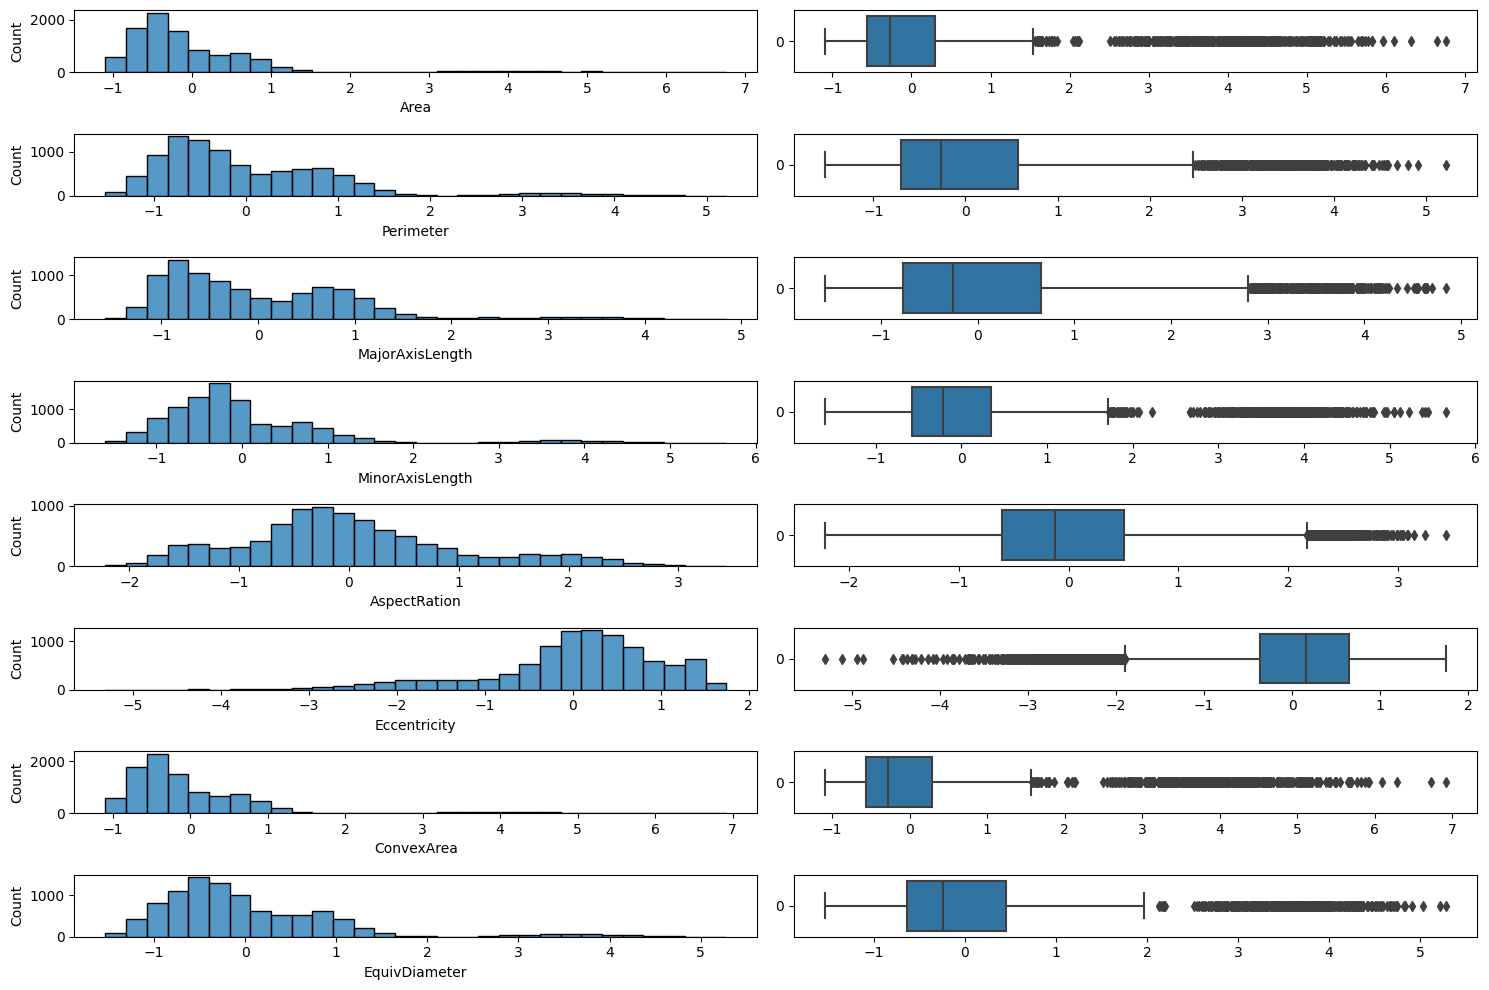

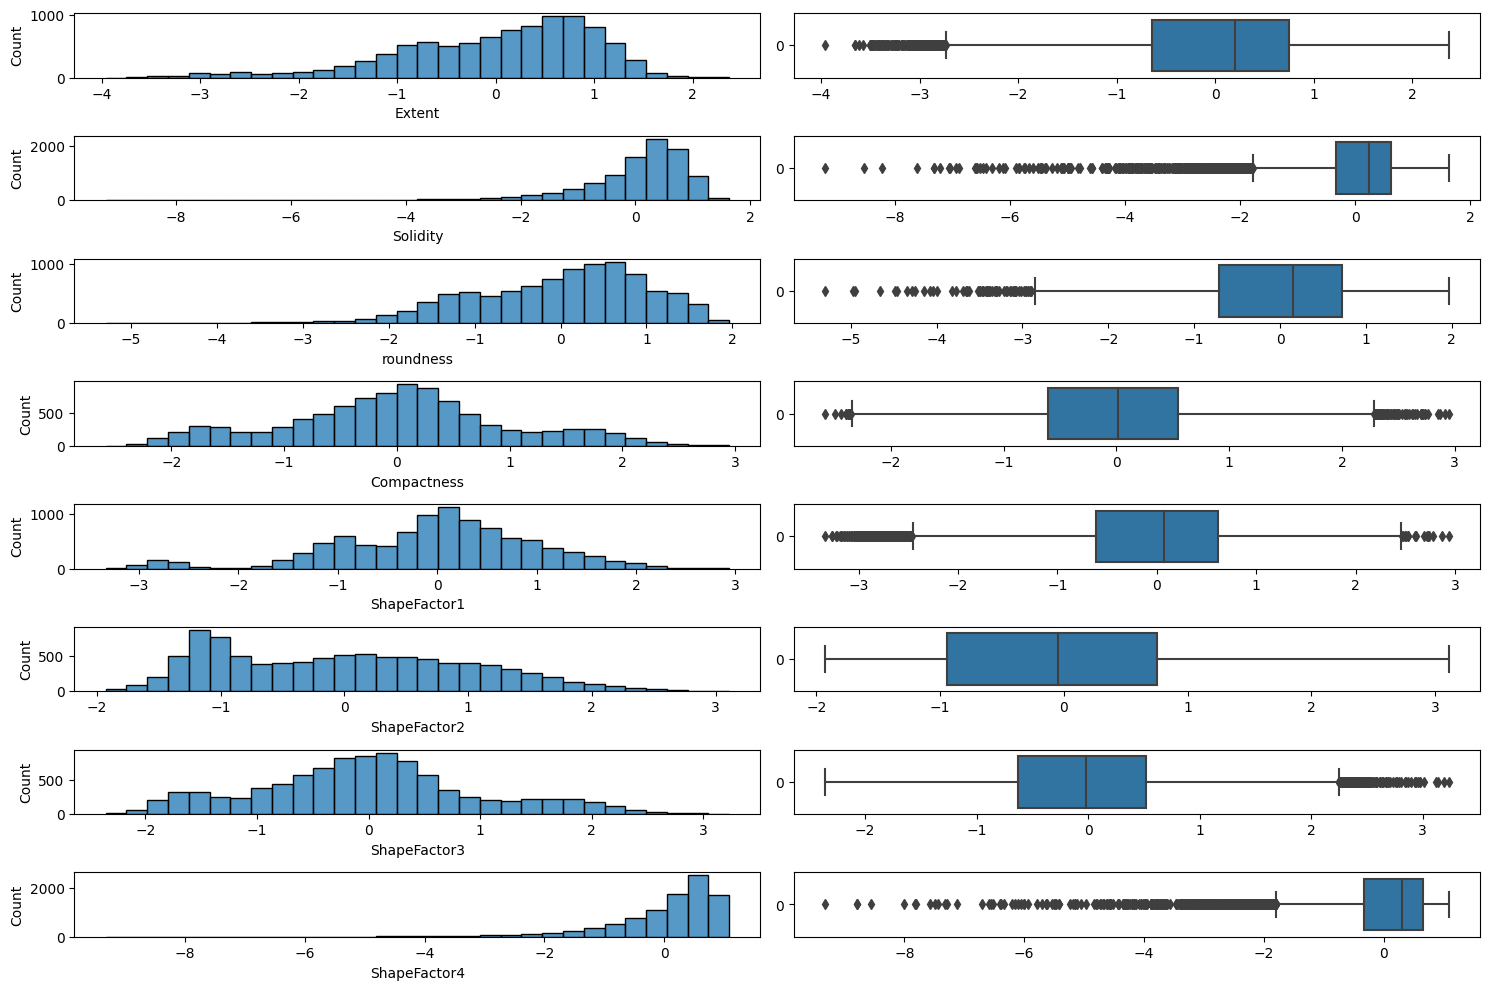

In [13]:
#splititng attributes for ease of plots

col1 = (['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter'])

col2 = ['Extent','Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

#plot the first 8 variables
fig, axs = plt.subplots(len(col1), 2,figsize=(15, 10))

for i, var in enumerate(col1):
    sns.histplot(df_analysis[var], bins=30, edgecolor='black', ax=axs[i][0])
    sns.boxplot(df_analysis[var],orient="h", ax=axs[i][1])

plt.tight_layout()
plt.show()

print('\n')

#plotting the last 8 variables
fig, axs = plt.subplots(len(col2), 2,figsize=(15, 10))

for i, var in enumerate(col2):
    sns.histplot(df_analysis[var], bins=30, edgecolor='black', ax=axs[i][0])
    sns.boxplot(df_analysis[var],orient="h", ax=axs[i][1])

plt.tight_layout()
plt.show()

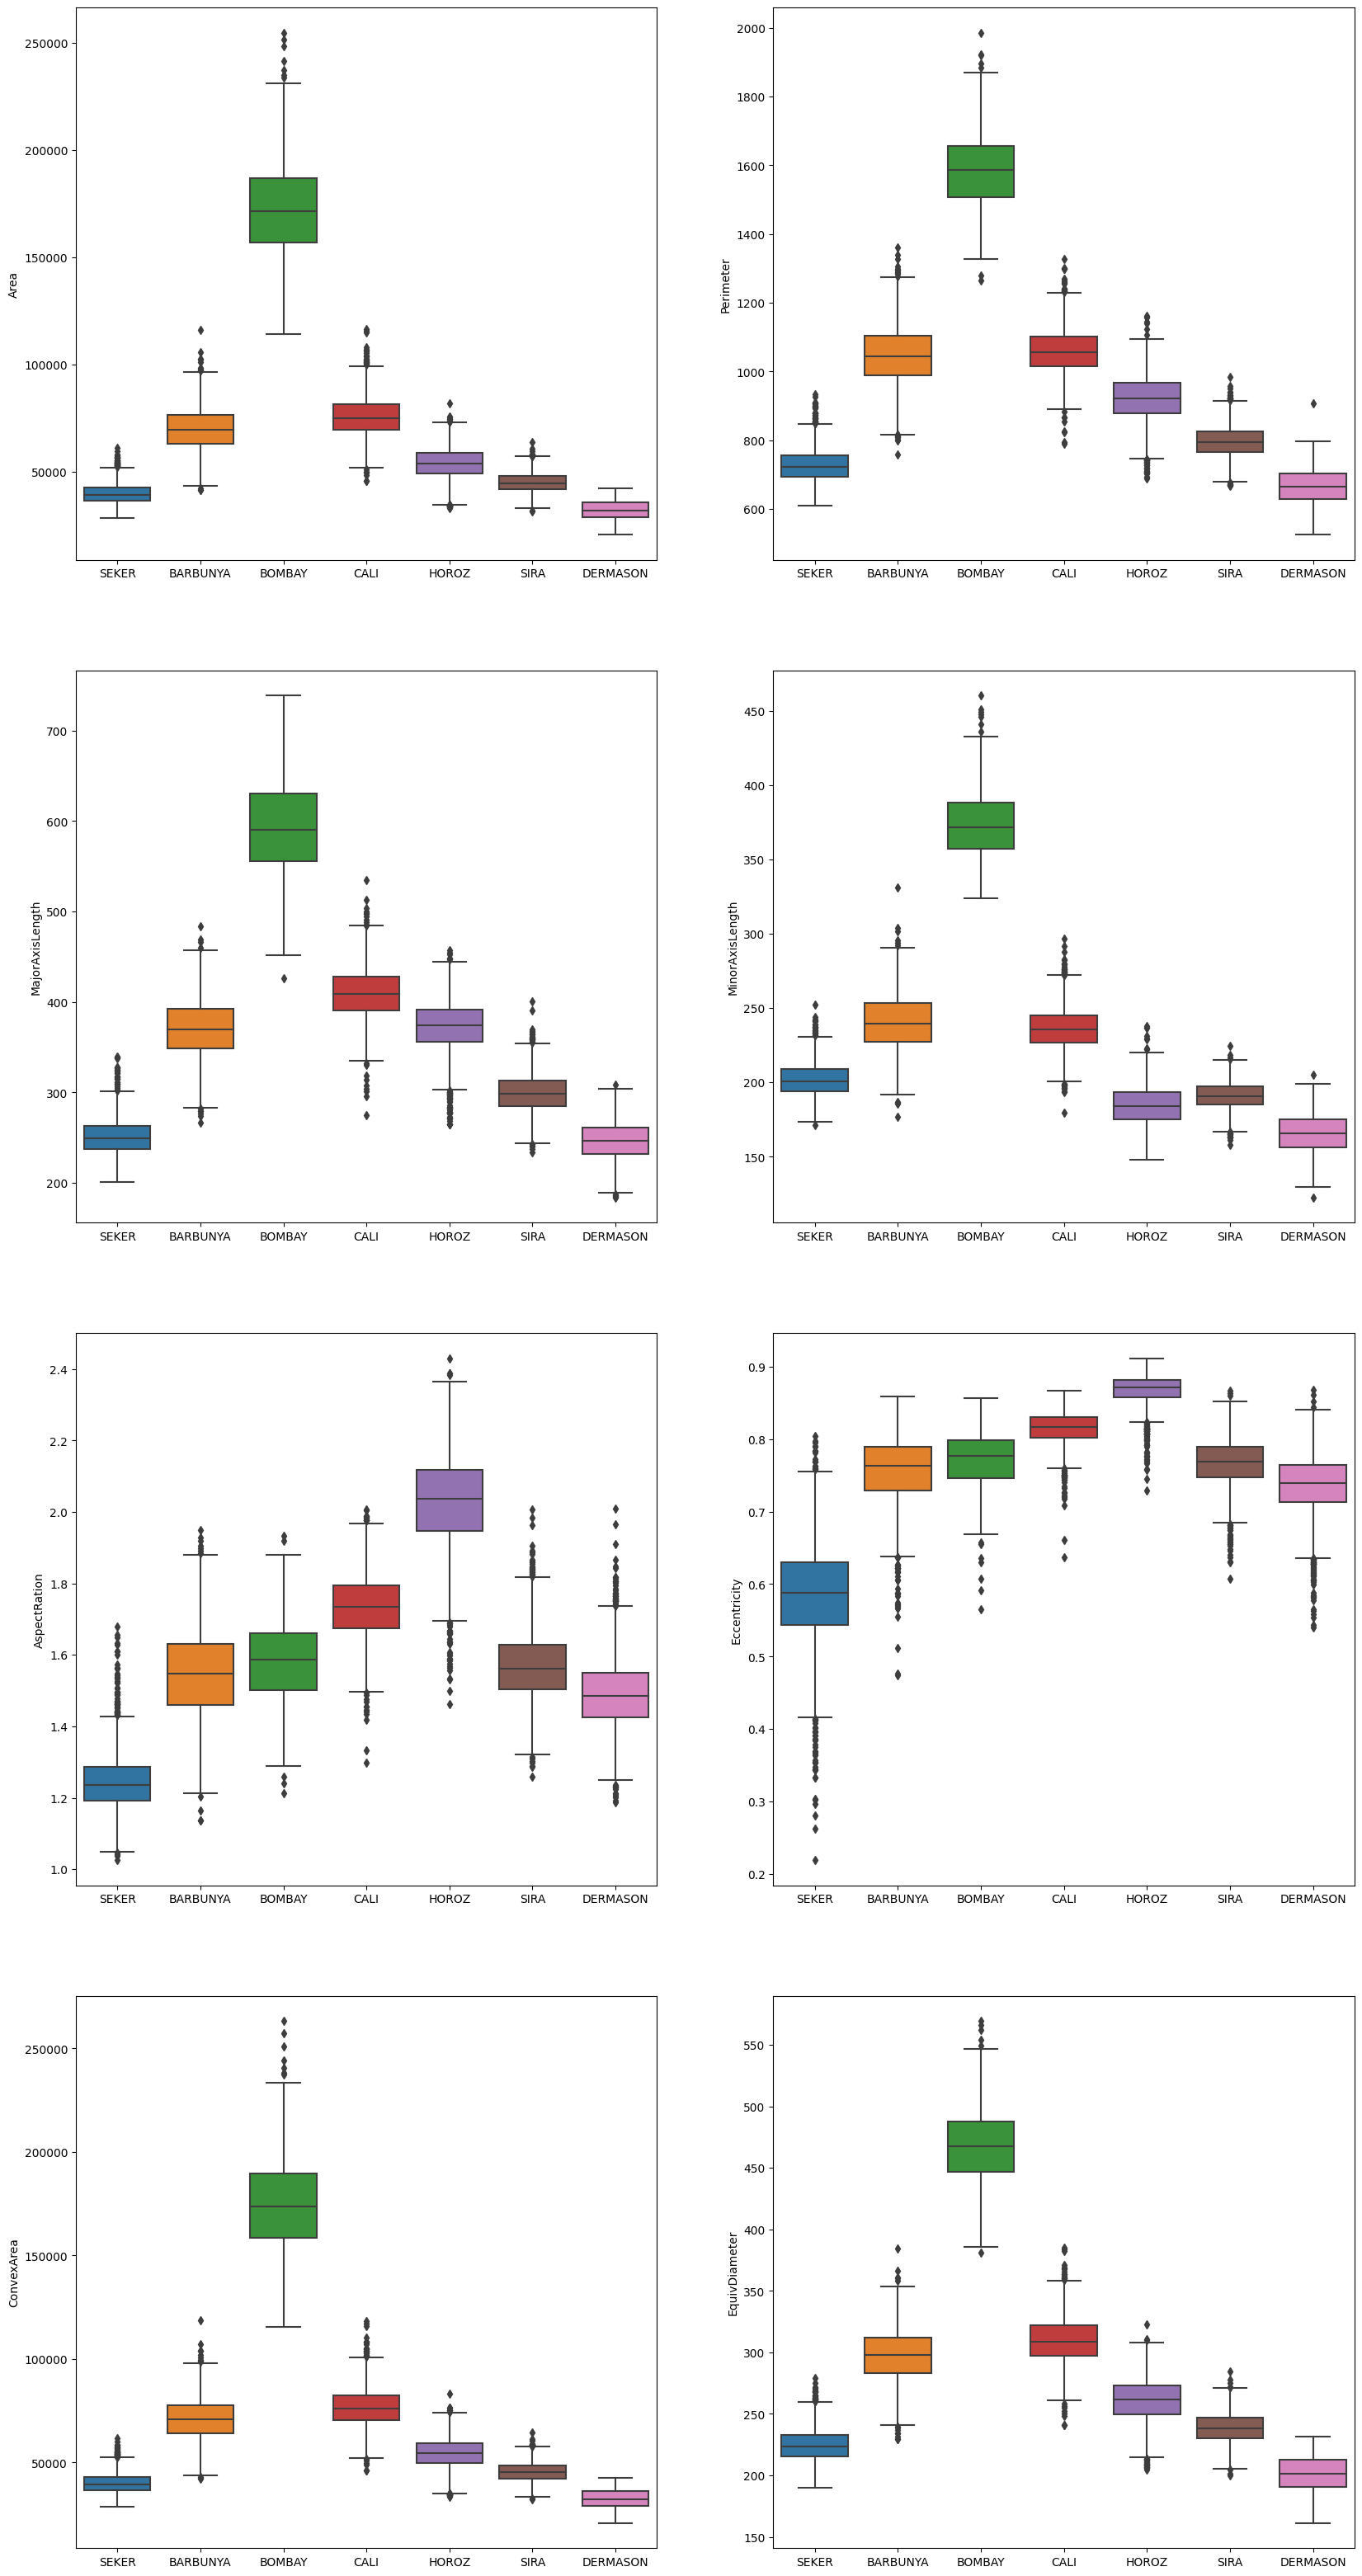

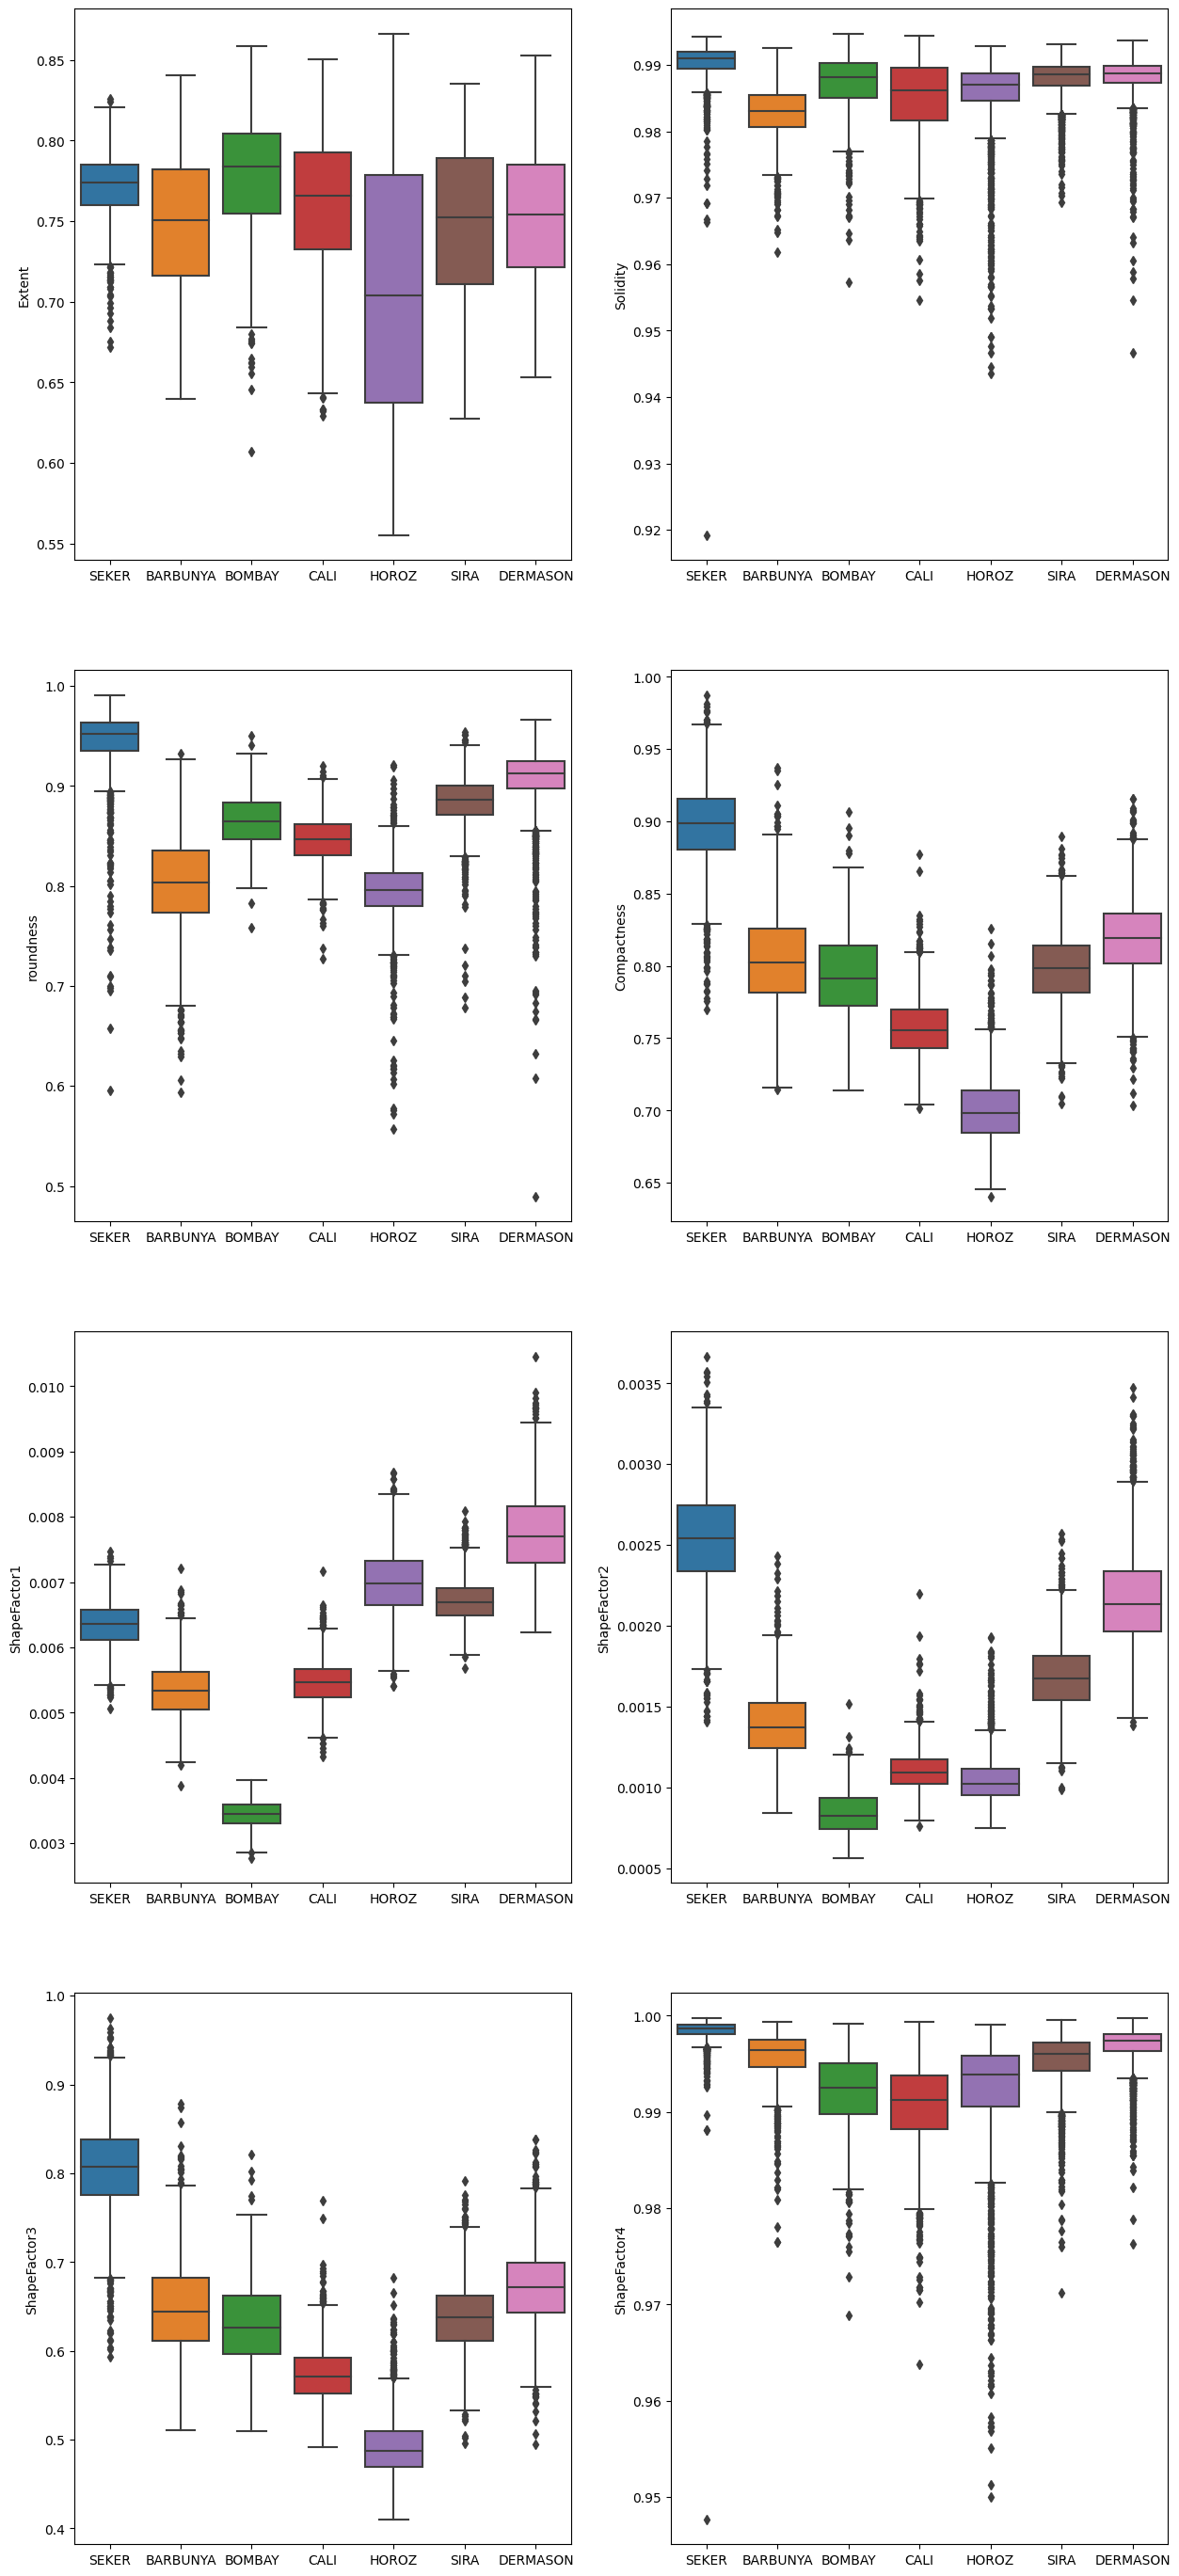

In [16]:
# plotting w.r.t class to check the distributions & ouliers in each

#first 8 variables
fig, axes = plt.subplots(4, 2, figsize = (20, 40))
for col, ax in zip(df_analysis.iloc[:,0:8], axes.flatten()):
    sns.boxplot(data=df,
                   x="Class",
                   y=col,
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

print('\n')

#last 8 variables
fig, axes = plt.subplots(4, 2, figsize = (15, 35))
for col, ax in zip(df_analysis.iloc[:,8:], axes.flatten()):
    sns.boxplot(data=df,
                   x='Class',
                   y=col,
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

###3.1Insights from Univariate:

- Most of the features are left or right skewed and have a lot of outliers(long tail in eccentricity, solidity, roundness, shape factor2, shape factor4)
- W.r.t area related features (Area, perimeter, convex area, equvidistance, major axis), we can differentiate the 'Bombay' class
- And group ['Sira','Seker','Dermason] & ['BARBUNYA' 'HOROZ' 'CALI'] & ['Bombay'] can be seperated
- We can see there could be an overlap in between the classes of the first 2 groups  
-  Both Barbunya class and Cali class have similar distributions and values in many features (area, minor axis length, equivalent diameter, extent, shape factor1), which may lead to mislabeling one as the other.

- Dermason class is similar to Seker class in some features, and Sira class in other features. It may be a difficult class to label accurately!

Some features have a very skewed distribution with long tails (eccentricity, solidity, roundness, shape factor2, shape factor4) <br>
Bombay class differs greatly from other classes, it has a larger area and perimeter, and can be clearly distinguished from other classes based on Minor Axis Length and Shape Factor 1. <br>

# 4.Multi Variate Analysis

<ipython-input-17-45b501f77a65>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_analysis.corr(),annot=True, cmap = 'RdYlGn', fmt = '.2f')


<Axes: >

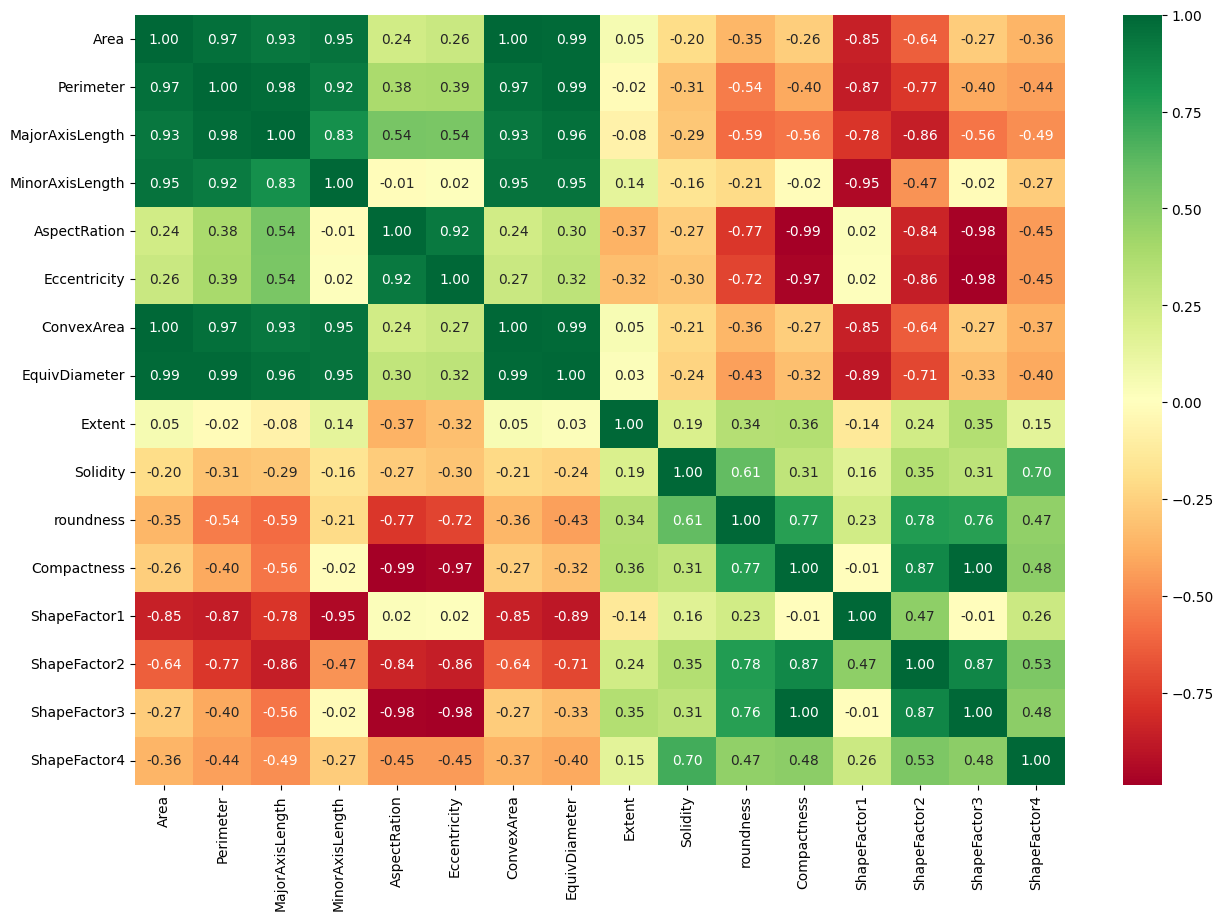

In [17]:
#correlation analysis:
plt.figure(figsize=(15,10))
sns.heatmap(df_analysis.corr(),annot=True, cmap = 'RdYlGn', fmt = '.2f')

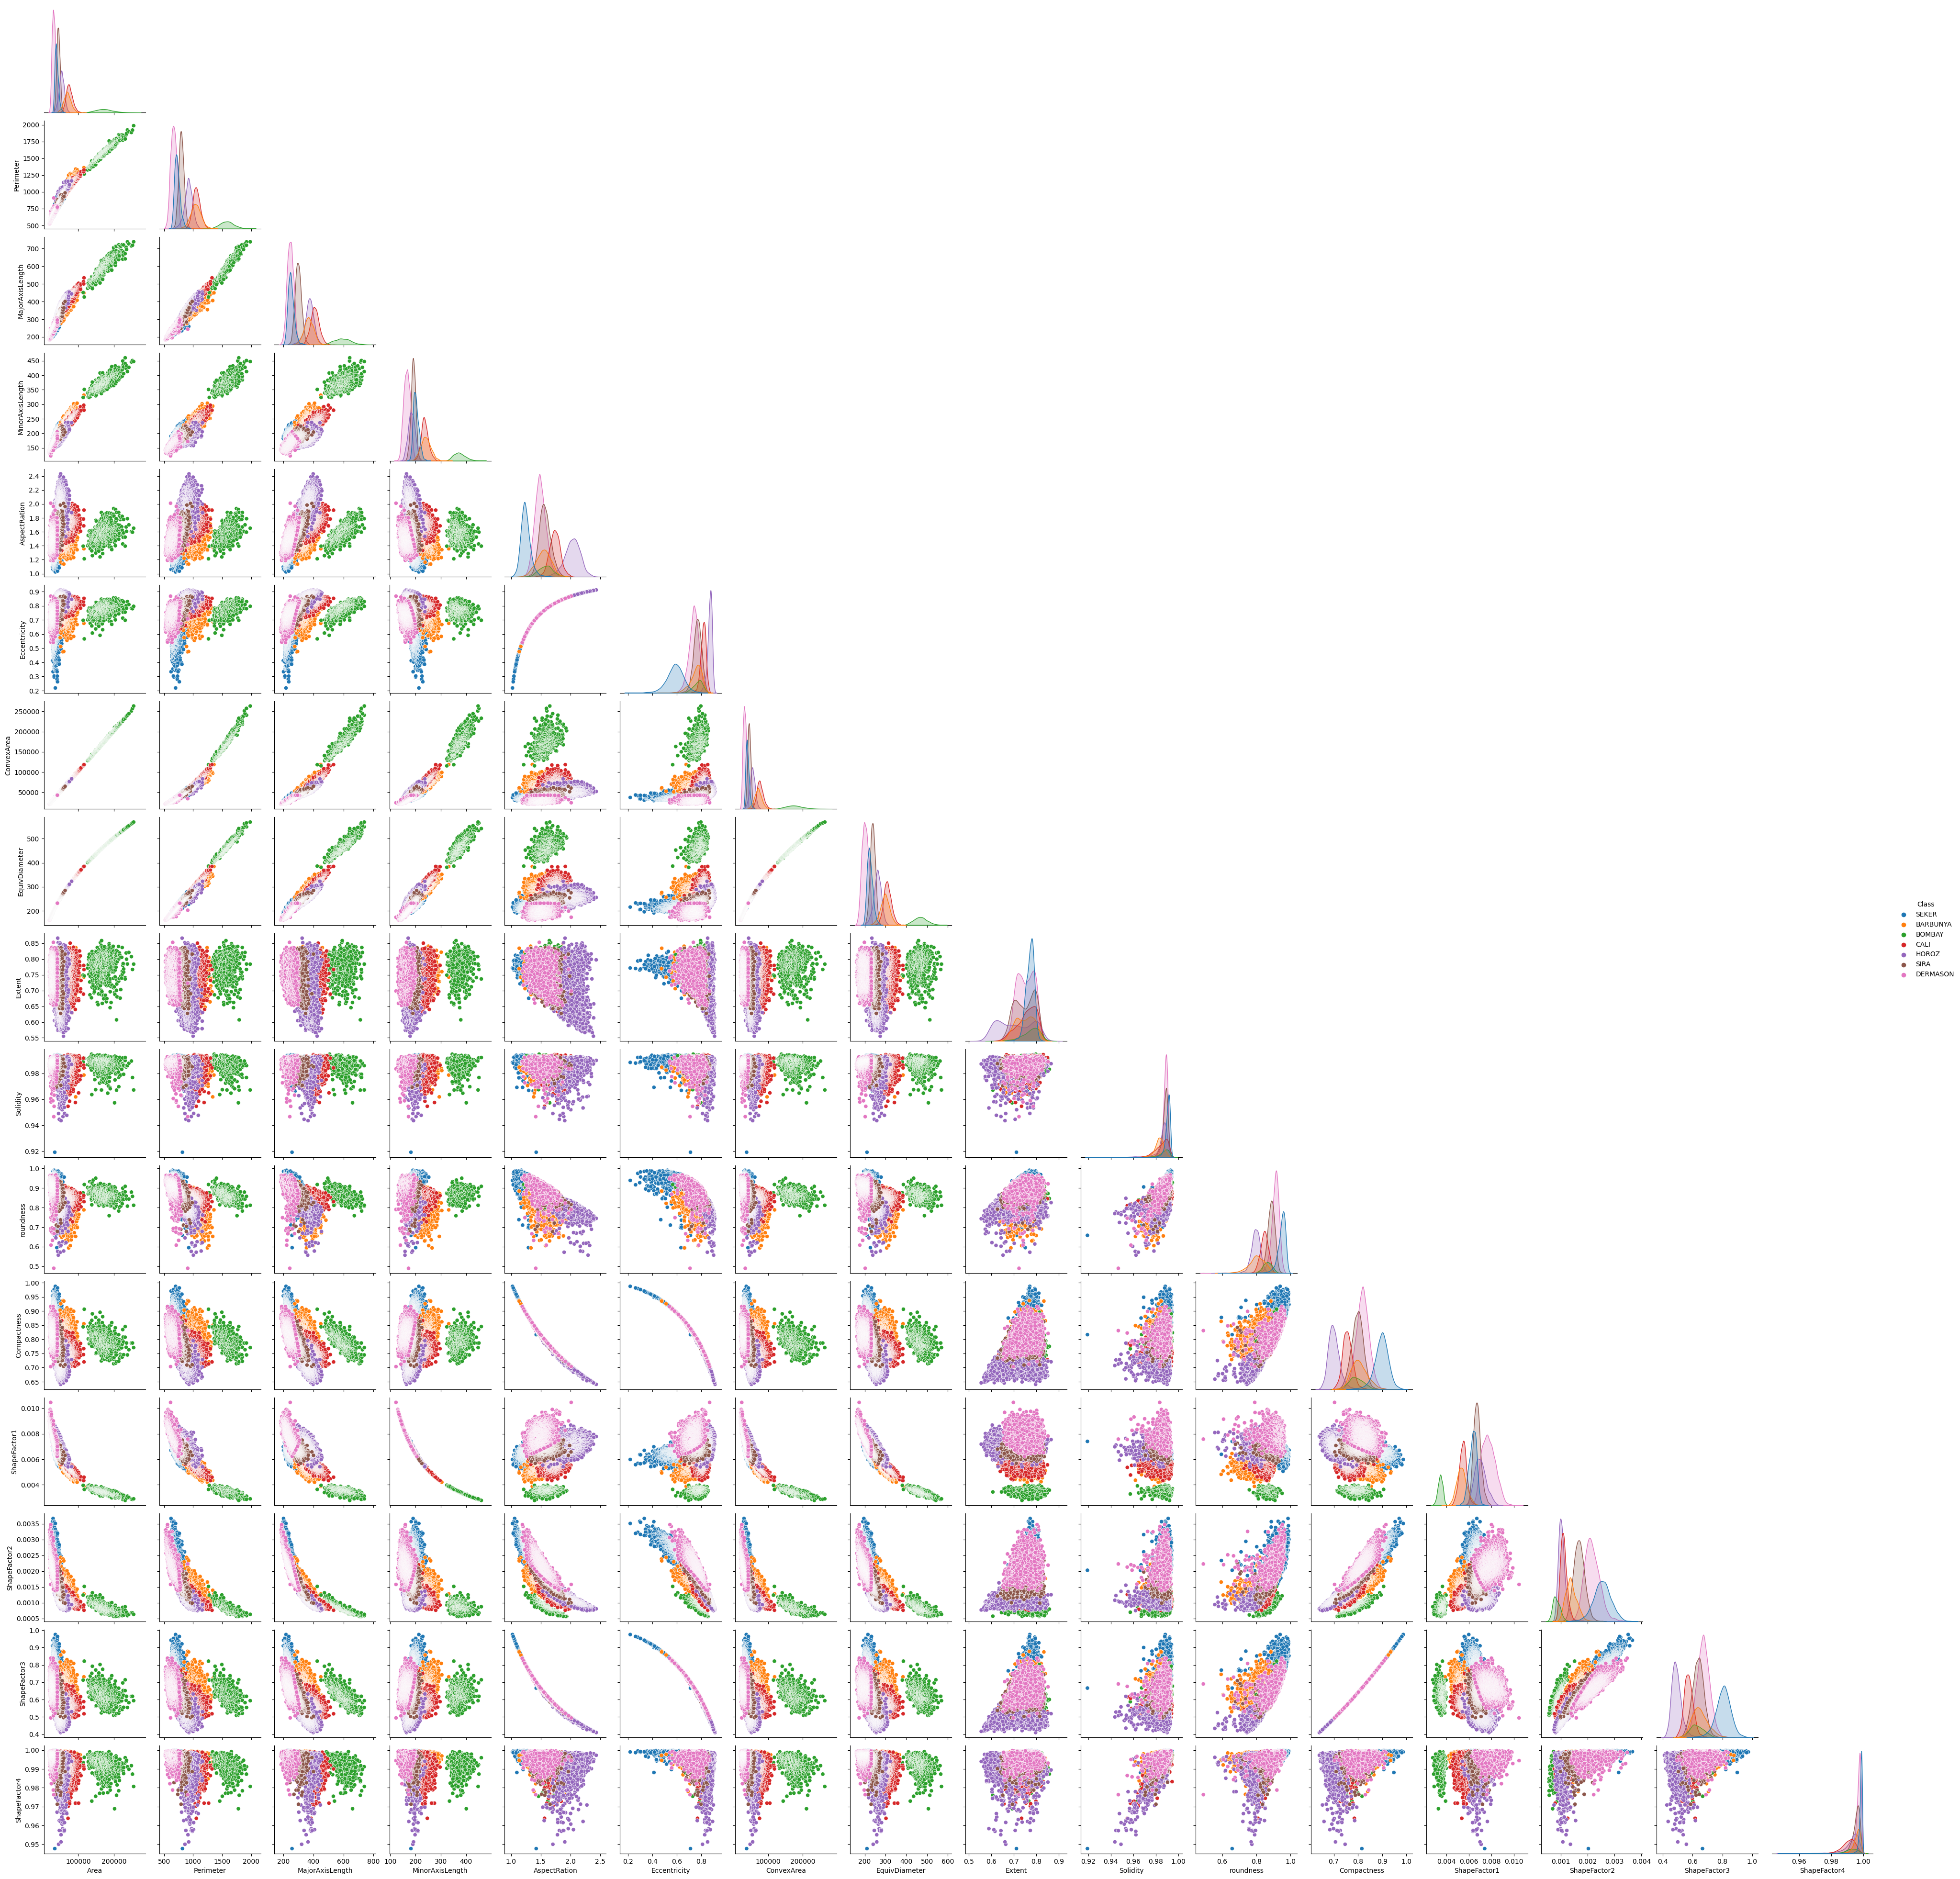

In [18]:
#pairplots:
sns.pairplot(df,corner=True, hue='Class')

## 4.1Insights from multivariate:
- For correlation plots following pairs have highest correlation with each other:
 - area & convex area : 1.00
 - compactness & shape factor 3 : 1.00
  - equivalent diameter & perimeter: 0.99
  - equivalent diameter & convex area: 0.99
  - major axis length & perimeter: 0.98
 - area & perimeter: 0.97
  - convex area & perimeter : 0.97
  - major axis length & equivalent diameter : 0.96
 -  minor axis length & equivalent diameter : 0.95
  - minor axis length & convex area : 0.95
 -  minor axis length & shape factor 1 : -0.95
  - eccentricity & compactness : -0.97
 -  eccentricity & shape factor 3 : -0.98
 - aspect ration & shape factor 3 : -0.98
  - aspect ration & compactness : -0.99


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
X = df_analysis.iloc[:,:-1]
y = df_analysis.iloc[:,-1:]

## 4.2 Mutual information 

<br>
Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. <br> It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [20]:
import matplotlib.pyplot as plt 
# compares with target variable to select the features 
# higher values represents higher dependency on target variable 

def select_feature_MI(X_train, y_train):
    
    Sb = SelectKBest(score_func = mutual_info_classif, k = 'all')
    Sb.fit(X_train,y_train)
    X_train = Sb.transform(X_train)
    return X_train, Sb


X_train_selected,  fs = select_feature_MI(X,y)

selected_features_df = pd.DataFrame({'features': list(X.columns), 
                                    'Scores': fs.scores_})
selected_features_df.sort_values(by='Scores', ascending= False)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


features    Scores
1         Perimeter  1.061701
6        ConvexArea  1.045421
7     EquivDiameter  1.043670
0              Area  1.043248
2   MajorAxisLength  1.001379
13     ShapeFactor2  0.954434
12     ShapeFactor1  0.941677
3   MinorAxisLength  0.938572
11      Compactness  0.837169
14     ShapeFactor3  0.837167
4      AspectRation  0.819077
5      Eccentricity  0.819054
10        roundness  0.793821
15     ShapeFactor4  0.368233
9          Solidity  0.233212
8            Extent  0.199112

 we can see that "Solidity","ShapeFactor4","Extent". has the lowest scores, which means less likely to depend on target variable

## 4.2.2 ANOVA / F-value 




F-test estimate the degree of linear dependency between feature and target variable.

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<BarContainer object of 16 artists>

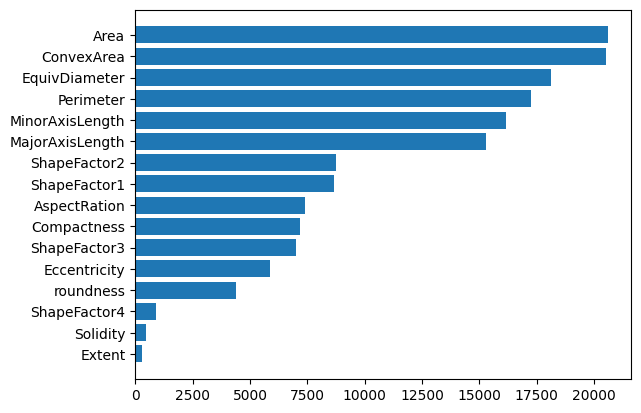

In [21]:
# Anova/F-test to see the dependency of the variables w.r.t targe tvariable:
def select_feature_f(X_train, y_train):
    
    Sb = SelectKBest(score_func = f_classif, k = 'all')
    Sb.fit(X_train,y_train)
    X_train = Sb.transform(X_train)
    return X_train, Sb


X_train_selected_f, fs_f = select_feature_f(X,y)

selected_features_df = pd.DataFrame({'features': list(X.columns), 
                                    'Scores': fs_f.scores_})

selected_features_df = selected_features_df.sort_values(by='Scores', ascending= True)

plt.barh(selected_features_df['features'],selected_features_df['Scores'])




- From Mutual Information & F-test, we can see that follwoing variables have least dependency w.r.t to response variable:
 - ShapeFactor4
 - Solidity
 - Extent

we can conclude that, the above highly correlated features are not useful for our analysis and can be dropped.
Similarlly, features that offer very low information to the dependent variable can also be dropped.
- We can drop  - ['Extent','Solidity','ShapeFactor4']

#5.Feature Selections

## 5.1 Model based feature selection 


### L1 penalising for feature selection 
<br>
we considered L1 penality to reduce the dimensions of the data using linear_SVM, in linear_SVM the parameter C decides the level of penality to be imposed, that is if C is lower fewer feature will be selected 

In [22]:
X.shape

(9527, 16)

In [88]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_model_based = model.transform(X)
X_model_based.shape


# Get the names of the selected features
feature_names = list(X.columns[model.get_support()])

# Get the coefficients of the selected features
coef = lsvc.coef_[0][model.get_support()]

# Print the names and coefficients of the selected features
for feature, coef in zip(feature_names, coef):
    print(feature, coef)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area -0.7129042657927699
Perimeter 0.0
MinorAxisLength 0.0
AspectRation -0.5765225773016541
Eccentricity 0.07657833517925818
ConvexArea 0.0
Extent 0.0
Solidity -0.1506943907995361
roundness -0.5578115120121133
ShapeFactor1 -0.8749454979972037
ShapeFactor2 -0.4641615828024252
ShapeFactor3 0.0
ShapeFactor4 0.3965996814873473
['Area', 'Perimeter', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


with C being 0.01 , the dimensions are reduced from 16 to 12

In [107]:
df_analysis.columns

Index(['Area', 'AspectRation', 'Eccentricity', 'EquivDiameter', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'Class'],
      dtype='object')

## 5.2Dropping features based on Multi-variate feature selection methods

In [42]:
df_UV = df_analysis
df_UV.drop(['ShapeFactor4','Solidity', 'Extent'], axis=1, inplace=True)

<ipython-input-25-1e68bfb57f7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_UV.corr(),annot=True)


<Axes: >

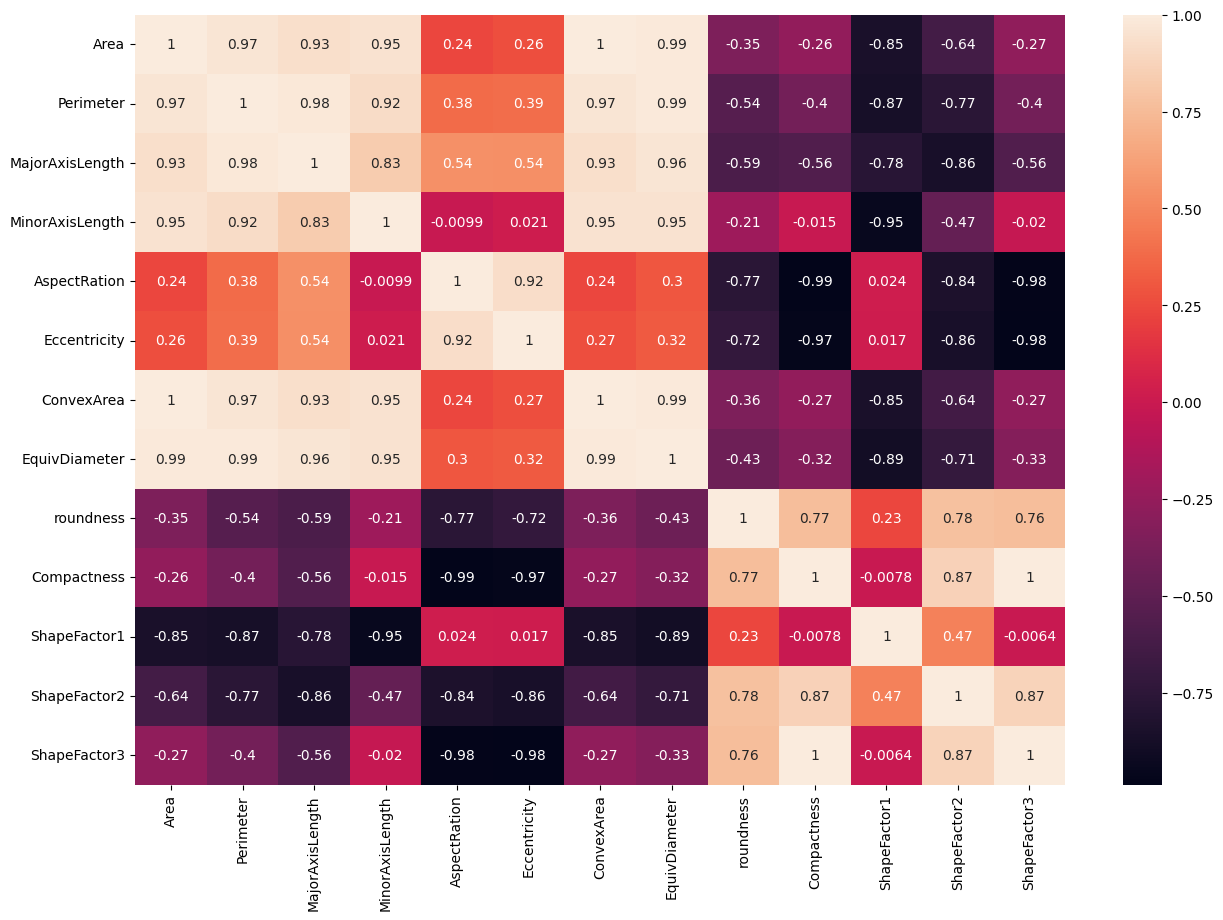

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df_UV.corr(),annot=True)

There are still some highly correlated features like Area and Convex Area, compactness and shape factor 3 <br>
by univariate analysis, removing the feature which have lower scores 

In [43]:
df_UV.drop(['ShapeFactor3','ConvexArea'], axis=1, inplace=True)

- There appears to be a linear relationship among several features. 
- Notably, the Bombay class is distinguishable from other classes in some features, suggesting that a model may be able to accurately classify it, despite its small representation in the dataset. 
- The scatterplots reveal clear clusters for each class, particularly with respect to the area and perimeter features in comparison to all other features. - However, there is some overlap between the Dermason and Sira classes. - Additionally, certain features such as aspect ratio, eccentricity, and compactness seem to reach a maximum value when plotted against roundness, implying that no outliers exist above this threshold within the given data.
-most of the classes are linearly sepereable with respect to features 
- we can use SVM_linear and Naive Bayes as algorithms for linearly seperable data 
- but there are also some non linear trends observed in the data with respect to features 
- so we tried KNN, multinomial logistic(softmax) and Neural Networks

In [44]:
# data set for multi/univariate feature selction 
X_train_UV = df_UV.iloc[:,:-1]
y_train_UV = df_UV.iloc[:,-1:]
X_test_UV = df_test_analysis.drop(['ShapeFactor4','Solidity', 'Extent','ShapeFactor3','ConvexArea'], axis=1).iloc[:,:-1]
y_test_UV = df_test_analysis['Class'].values.reshape(df_test_analysis['Class'].shape[0],1)


In [45]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, categories='auto')
y_train_UV = enc.fit_transform(y_train_UV.values.reshape(len(y_train_UV), -1))
y_test_UV = enc.transform(y_test_UV.reshape(len(y_test_UV), -1))
print("UV x train shape",X_train_UV.shape)
print("UV y train shape",y_train_UV.shape)
print("UV x test shape",X_test_UV.shape)
print("UV y test shape",y_test_UV.shape)

UV x train shape (9527, 11)
UV y train shape (9527, 7)
UV x test shape (4084, 11)
UV y test shape (4084, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
# data set for model based feature selection 

X_train_model_based = X_model_based
y_train_model_based = y
X_test_model_based = model.transform(X_test)
y_test_model_based = y_test

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [47]:
enc = OneHotEncoder(sparse=False, categories='auto')
y_train_model_based = enc.fit_transform(y_train_model_based.values.reshape(len(y_train_model_based), -1))
print("model x train shape",X_train_model_based.shape)
print("model y train shape",y_train_model_based.shape)
print("model x test shape",X_test_model_based.shape)
print("model y test shape",y_test_model_based.shape)

model x train shape (9527, 13)
model y train shape (9527, 7)
model x test shape (4084, 13)
model y test shape (4084, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 5.3 Dimnesionality Reduction

### 5.3.1. Dimensionality reduction using PCA

In [48]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
    
    def fit(self,X):
        cov = np.cov(X.T)
        eigVal, eigVec = np.linalg.eig(cov)
        u , s, v = np.linalg.svd(cov)
        eigVec= eigVec.T
        
        ids = np.argsort(eigVal)[::-1]
        eigVal = eigVal[ids]
        eigVec = eigVec[ids]
        
        self.components = eigVec[0:self.n_components]
        plt.bar(range(X.shape[1]), s, color ='maroon',width = 0.4)
        plt.xlabel("components")
        plt.ylabel("% variance retained")
        plt.title("variance VS components")
        plt.show()
    def transform(self,X):
        return np.dot(X, self.components.T)
    

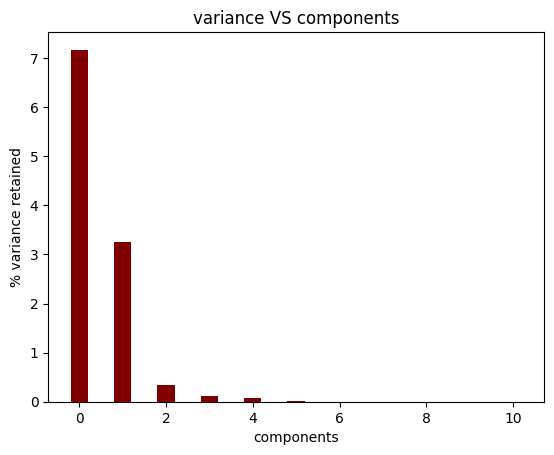

In [49]:
model_PCA = PCA(n_components = 2)
model_PCA.fit(X_train_UV)
X_train_UV_pca = model_PCA.transform(X_train_UV)
X_test_UV_pca = model_PCA.transform(X_test_UV)

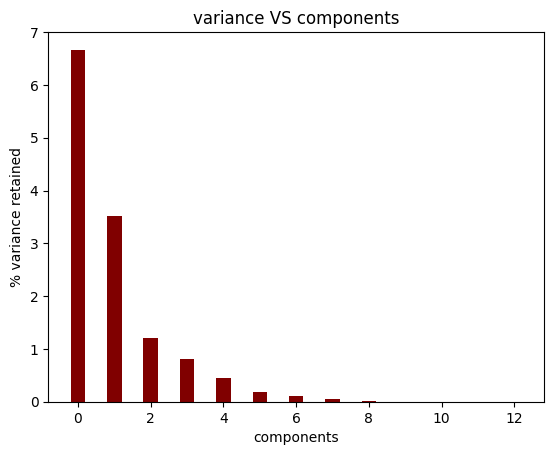

In [50]:
model_PCA1 = PCA(n_components = 4)
model_PCA1.fit(X_train_model_based)
X_train_model_based_pca = model_PCA1.transform(X_train_model_based)
X_test_model_based_pca = model_PCA1.transform(X_test_model_based)

so, basically we have 2 kinds of data now <br>
uni-variate feature selection with PCA data <br>
uni-variate feature selection with Variational AutoEncoder data <br>


## 6.Models

### 6.1 Multinomial Logistic Regression

In [51]:
#data set 
#X_train_UV_pca
#y_train_UV
#X_test_UV_pca
#y_test_UV

In [52]:
class logit:

    def __init__(self,X_train,y_train,X_test,y_test, reg,reg_param, learning_rate = 0.00001, tol = 0.00005, maxIter = 50000):

        self.X_train = X_train
        self.y_train = y_train
        self.X_test= X_test
        self.y_test = y_test
        self.learning_rate = learning_rate
        self.tol = tol
        self.maxIter = maxIter
        self.error = []
        self.iter_count = []
        self.reg = reg
        self.reg_param = reg_param
        #self.sgd = sgd

    def addBias(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    
    def softmax(self,z):
        z = z - np.max(z)
        z = np.exp(z)
        return np.divide(z , z.sum(axis=0)) 
    
    def costFunction(self,X,y):
        y_hat = self.softmax(X.dot(self.w)) # y_hat = predicted labels 
        cost  = - np.sum(np.log(y_hat) * y, axis=1) # - sum(  y * log ( y_hat )  )
        if self.reg: 
          cost  = cost + (self.reg_param * ( np.sum(np.square(self.w)) ) )
        return 0.5* np.mean(cost)

    def gradient(self,X,y):
        #print(y)
        softmax = self.softmax(X.dot(self.w))
        grad_w = X.T.dot(softmax - y)
        #print(grad.shape)
        #grad_b = np.sum(softmax - y)
        return grad_w / X.shape[0] 

    def gradientDescent(self,X,y):
        prev_error = float('inf')
        print(y.shape)
        for i in tqdm(range(self.maxIter)):
            W  = self.gradient(X,y)
            if self.reg: # L2 regularisation 
              w_update = self.w * (1 - self.learning_rate *( self.reg_param / X.shape[0]))
              self.w  = w_update - (self.learning_rate  * W) 
            else: 
            
              self.w = self.w - self.learning_rate * W
            curr = self.costFunction(X,y)
            self.error.append(curr)
            self.iter_count.append(i)
            diff = prev_error - curr
            prev_error= curr

            if abs(diff) < self.tol:
                print("stopped")
                break
        print("trian error:", curr)
        #self.plot()
            #break
        #plot function 
      
    
    #change
    def predict(self,X):
        np.column_stack([np.ones([X.shape[0],1]),X])
        pred = self.softmax(X.dot(self.w))
        return pred
    
    
    # change
    def evaluate(self,y,y_hat):
        #print(y.shape)
        #print(y_hat.shape)
        y = np.argmax(y, axis = 1)
        y_hat = np.argmax(y_hat, axis = 1)
        accuracy = np.mean(y==y_hat) #.sum() / y.size
        #precision = (y&y_hat).sum() / y_hat.sum()
        #recall = (y&y_hat).sum() / y.sum()
        
        return  accuracy
    
    
    def fit(self):
 
        self.addBias(self.X_train) 
        #self.addBias(self.X_test)
        # random weights with shape x_train.shape[1], y_train.shape[1]
        #self.b = np.zeros((self.y_train.shape[0],1))
        self.w = np.random.randn(self.X_train.shape[1], self.y_train.shape[1]) * (2 / np.sqrt(X_train.shape[0]))
        #print(self.w.shape)
        self.gradientDescent(self.X_train,self.y_train)
        y_hat = self.predict(self.X_test)
        accuracy = self.evaluate(self.y_test, y_hat)
        print("accuracy:", accuracy)
        test_error = self.costFunction(self.X_test,self.y_test)
        print("test error:" , test_error)
        #print("precision:", precision)
        #print("recall:", recall)
        
    def plot(self, figsize=(7,5)): 
        plt.figure(figsize=figsize)
        plt.plot(self.iter_count,self.error)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()



  

(9527, 7)


 82%|████████▏ | 3297/4000 [00:14<00:03, 230.54it/s]


stopped
trian error: 4.286905612445584
accuracy: 0.7600391772771793
test error: 3.86749829737594
(9527, 7)


 69%|██████▊   | 2744/4000 [00:12<00:05, 227.96it/s]


stopped
trian error: 4.280198541345008
accuracy: 0.7984818805093046
test error: 3.8595279757456424
(9527, 7)


 53%|█████▎    | 2112/4000 [00:09<00:08, 218.95it/s]


stopped
trian error: 4.245056496152732
accuracy: 0.8237022526934378
test error: 3.8244569885367623
(9527, 7)


 35%|███▍      | 1397/4000 [00:05<00:11, 235.31it/s]


stopped
trian error: 4.244106642192423
accuracy: 0.8082761998041136
test error: 3.8222945934409034
(9527, 7)


 29%|██▉       | 1159/4000 [00:05<00:13, 214.42it/s]


stopped
trian error: 4.2427207293046045
accuracy: 0.8023996082272282
test error: 3.820688874748126
(9527, 7)


  6%|▋         | 257/4000 [00:01<00:14, 253.69it/s]


stopped
trian error: 4.245106251687475
accuracy: 0.7886875612144956
test error: 3.8218024359831784


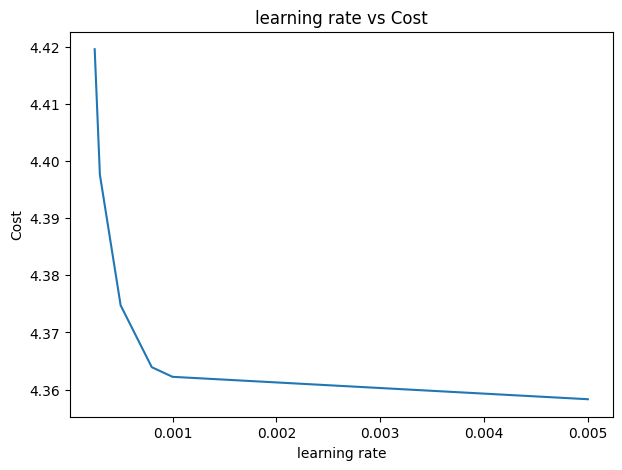

In [53]:
from tqdm import tqdm
lr_error = []
reg_cost = []
reg_param = [0.001,0.005,0.009,0.01,0.15,0.2 ]
learning_rate = [0.00025,0.0003,0.0005,0.0008,0.001,0.005 ]

for j in learning_rate:
    reg_logit = logit(X_train_UV_pca,y_train_UV,X_test_UV_pca,y_test_UV ,reg = True,reg_param = 0.005,learning_rate = j, tol = 0.00005, maxIter = 4000)
    reg_logit.fit()
    lr_error.append(np.mean(reg_logit.error))



plt.figure(figsize=(7,5))
plt.plot(learning_rate,lr_error)
plt.xlabel('learning rate')
plt.ylabel('Cost')
plt.title("learning rate vs Cost")
plt.show()

(9527, 7)


 64%|██████▍   | 2575/4000 [00:11<00:06, 225.14it/s]


stopped
trian error: 4.239781319209315
accuracy: 0.7938295788442703
test error: 3.8166077670619227
(9527, 7)


 64%|██████▎   | 2542/4000 [00:11<00:06, 225.79it/s]


stopped
trian error: 4.2402079576634275
accuracy: 0.7923604309500489
test error: 3.818006158070861
(9527, 7)


 63%|██████▎   | 2529/4000 [00:11<00:06, 225.44it/s]


stopped
trian error: 4.244579552946775
accuracy: 0.7896669931439765
test error: 3.8224243519455987
(9527, 7)


 65%|██████▌   | 2601/4000 [00:11<00:06, 224.92it/s]


stopped
trian error: 4.246417614850124
accuracy: 0.7921155729676788
test error: 3.824579253307685
(9527, 7)


 43%|████▎     | 1739/4000 [00:06<00:09, 250.84it/s]


stopped
trian error: 4.3386262392737995
accuracy: 0.7825661116552399
test error: 3.918216391204839
(9527, 7)


 41%|████      | 1622/4000 [00:09<00:13, 172.95it/s]


stopped
trian error: 4.366836651713538
accuracy: 0.7627326150832517
test error: 3.946515906326936


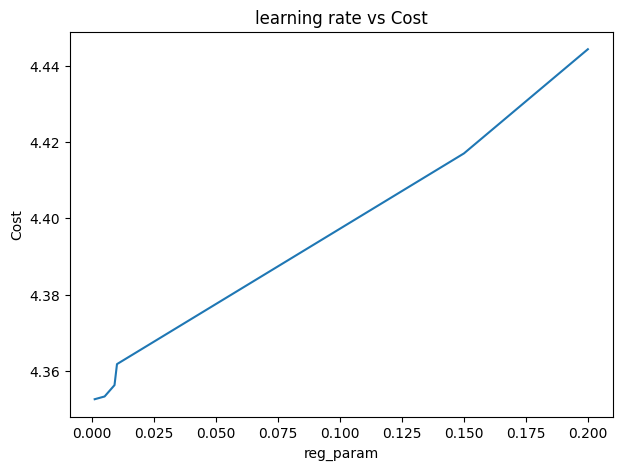

In [54]:
reg_cost = []
for j in reg_param:
    reg_logit = logit(X_train_UV_pca,y_train_UV,X_test_UV_pca,y_test_UV ,reg = True,reg_param = j,learning_rate = 0.0005, tol = 0.000005, maxIter = 4000)
    reg_logit.fit()
    reg_cost.append(np.mean(reg_logit.error))
    

plt.figure(figsize=(7,5))
plt.plot(reg_param,reg_cost)
plt.xlabel('reg_param')
plt.ylabel('Cost')
plt.title("learning rate vs Cost")
plt.show()

In [57]:
#Accuracy of Logistic Regression
reg_logit = logit(X_train_UV_pca,y_train_UV,X_test_UV_pca,y_test_UV ,reg = True,reg_param = 0.005,learning_rate = 0.0005, tol = 0.00005, maxIter = 4000)
reg_logit.fit()
y_hat = reg_logit.predict(X_test_UV_pca)

#accuracy
reg_logit.evaluate(y_hat,y_test_UV)

(9527, 7)


 51%|█████     | 2032/4000 [00:10<00:09, 202.95it/s]

stopped
trian error: 4.255709886642347
accuracy: 0.8006856023506367
test error: 3.834306197603518


0.8006856023506367

### 6.2 Support Vector machine

In [58]:
class KernelSvmClassifier:
    
    def __init__(self, C, kernel):
        self.C = C                               
        self.kernel = kernel          # <---
        self.alpha = None
        self.supportVectors = None
    
    def fit(self, X, y):
        N = len(y)
        # --->
        # Gram matrix of h(x) y
        hXX = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  self.kernel(x1, x2), 1, X),
                                  1, X)   
        yp = y.reshape(-1, 1)
        GramHXy = hXX * np.matmul(yp, yp.T) 
        # <---

        # Lagrange dual problem
        def Ld0(G, alpha):
            return alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))

        # Partial derivate of Ld on alpha
        def Ld0dAlpha(G, alpha):
            return np.ones_like(alpha) - alpha.dot(G)

        # Constraints on alpha of the shape :
        # -  d - C*alpha  = 0
        # -  b - A*alpha >= 0
        A = np.vstack((-np.eye(N), np.eye(N)))             # <---
        b = np.hstack((np.zeros(N), self.C * np.ones(N)))  # <---
        constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y),     'jac': lambda a: y},
                       {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})

        # Maximize by minimizing the opposite
        optRes = optimize.minimize(fun=lambda a: -Ld0(GramHXy, a),
                                   x0=np.ones(N), 
                                   method='SLSQP', 
                                   jac=lambda a: -Ld0dAlpha(GramHXy, a), 
                                   constraints=constraints)
        self.alpha = optRes.x
        # --->
        epsilon = 1e-8
        supportIndices = self.alpha > epsilon
        self.supportVectors = X[supportIndices]
        self.supportAlphaY = y[supportIndices] * self.alpha[supportIndices]
        # <---
    
    def predict(self, X):
        """ Predict y values in {-1, 1} """
        # --->
        def predict1(x):
            x1 = np.apply_along_axis(lambda s: self.kernel(s, x), 1, self.supportVectors)
            x2 = x1 * self.supportAlphaY
            return np.sum(x2)
        
        d = np.apply_along_axis(predict1, 1, X)
        return 2 * (d > 0) - 1
def GRBF(x1, x2):
    diff = x1 - x2
    return np.exp(-np.dot(diff, diff) * len(x1) / 2)

In [59]:
def one_vs_all(X_train,y_train,X_test, y_test):
    noc = y_train.shape[1]
    m = X_train.shape[1]
    k = X_test.shape[1]
    
    cls_y_train = np.argmax(y_train, axis = 1)
    cls_y_test =  np.argmax(y_test, axis = 1)
    all_cls = np.unique(cls_y_train)
    #print(cls)
    for coi in all_cls:
        for i in range(len(cls_y_train)):
            if cls_y_train[i] == coi:
                cls_y_train[i] = 1
            else: 
                cls_y_train[i] = -1
        for i in range(len(cls_y_test)):
            if cls_y_test[i] == coi:
                cls_y_test[i] = 1
            else: 
                cls_y_test[i] = -1     
        svm = KernelSvmClassifier(C = 1,kernel=GRBF)
        svm.fit(X_train[:1000,:],cls_y_train[:1000])

        y_pred = svm.predict(X_test[:100,:])
        #print(y_pred.shape)
        correct = np.sum(y_pred == cls_y_test[:100])
        print("%d corrcted out of %d:" %(correct, len(y_pred)))

        break
    #return cls


In [60]:
#data set 
#X_train_UV_pca
#y_train_UV
#X_test_UV_pca
#y_test_UV
from scipy import optimize
one_vs_all(X_train_UV_pca,y_train_UV,X_test_UV_pca, y_test_UV)

96 corrcted out of 100:


### 6.3 Neural Networks

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from datetime import datetime
from sklearn.metrics import confusion_matrix

class DNN:
    
    def __init__(self,layer_dims,optim = None, reg = None, lambd = 0, mini_batch_size = 64):
        self.layer_dims = layer_dims
        self.costs= []
        self.iter_count = []
        self.reg = reg
        self.lambd = lambd
        self.optim = optim
        self.v_bias_correction = {}
        self.s_bias_correction = {}
        self.mini_batch_size = mini_batch_size 
        self.accuracy = None
        
    def sigmoid(self,Z):
        A = 1/(1+np.exp(-Z))
        cache = Z
        return A, cache

    def relu(self,Z):
        A = np.maximum(0,Z)
        assert(A.shape == Z.shape)
        cache = Z 
        return A, cache

    def softmax(self,Z):
        cache = Z
        e_x = np.exp(Z - np.max(Z))
        A = e_x / e_x.sum(axis=0)
        #print(e_x)
        return A, cache

    def relu_backward(self,dA, cache):
        Z = cache
        dZ = np.array(dA, copy=True) 
        dZ[Z <= 0] = 0
        #dZ[Z >0] = 1
        assert (dZ.shape == Z.shape)
       # print(dZ)
        return dZ

    def sigmoid_backward(self,dA, cache):
        Z = cache
        s = 1/(1+np.exp(-Z))
        dZ = dA * s * (1-s)
        assert (dZ.shape == Z.shape)
        return dZ
    
    def softmax_backward(self,softmax,cache):
        z = cache
        return np.diagflat(softmax) - np.dot(z, z.T)

    def initialize_parameters_deep(self):
        
        np.random.seed(1)
        self.parameters = {}
        L = len(self.layer_dims)            # number of layers in the network
        for l in range(1, L):                                                                            #he initialization
            self.parameters['W' + str(l)] = np.random.randn(self.layer_dims[l], self.layer_dims[l-1]) * np.sqrt(2 / self.layer_dims[l-1]) #*0.01
            self.parameters['b' + str(l)] = np.zeros((self.layer_dims[l], 1))

            assert(self.parameters['W' + str(l)].shape == (self.layer_dims[l], self.layer_dims[l-1]))
            assert(self.parameters['b' + str(l)].shape == (self.layer_dims[l], 1))
            
    def initialize_RMSprop_params(self):
        self.s = {}
        L = len(self.parameters) //2 
        for l in range(L):
            self.s['dW'+str(l+1)] = np.zeros((self.parameters['W'+str(l+1)].shape[0], self.parameters['W'+str(l+1)].shape[1]))
            self.s['db'+str(l+1)] = np.zeros((self.parameters['b'+str(l+1)].shape[0], self.parameters['b'+str(l+1)].shape[1]))
            
    def initialize_Adam_params(self):
        self.s = {}
        self.v = {}
        L = len(self.parameters) // 2
        for l in range(L):
            self.v['dW'+str(l+1)] = np.zeros((self.parameters['W'+str(l+1)].shape[0], self.parameters['W'+str(l+1)].shape[1]))
            self.v['db'+str(l+1)] = np.zeros((self.parameters['b'+str(l+1)].shape[0], self.parameters['b'+str(l+1)].shape[1]))
            self.s['dW'+str(l+1)] = np.zeros((self.parameters['W'+str(l+1)].shape[0], self.parameters['W'+str(l+1)].shape[1]))
            self.s['db'+str(l+1)] = np.zeros((self.parameters['b'+str(l+1)].shape[0], self.parameters['b'+str(l+1)].shape[1]))

    def linear_forward(self,A, W, b):
        Z = W.dot(A) + b
        assert(Z.shape == (W.shape[0], A.shape[1]))
        cache = (A, W, b)
        return Z, cache
    
    # GRADED FUNCTION: random_mini_batches

    def random_mini_batches(self,X, Y, seed = 0):
        #print(X.shape)
        np.random.seed(seed)            # To make your "random" minibatches the same as ours
        m = X.shape[0]                  # number of training examples
        mini_batches = []
        #Y = Y.T
        # Step 1: Shuffle (X, Y)
        permutation = list(np.random.permutation(m))
        shuffled_X = X[permutation,:]
        shuffled_Y = Y[permutation,: ] #.reshape((1, m))
        #print(shuffled_X.shape)
        #print(shuffled_Y.shape)
        inc = self.mini_batch_size

        # Step 2 - Partition (shuffled_X, shuffled_Y).
        # Cases with a complete mini batch size only i.e each of 64 examples.
        num_complete_minibatches = math.floor(m / self.mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[k*self.mini_batch_size : (k+1)*self.mini_batch_size,: ]
            mini_batch_Y = shuffled_Y[k*self.mini_batch_size  : (k+1)*self.mini_batch_size,: ]

            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
        if m % self.mini_batch_size  != 0:
            mini_batch_X = shuffled_X[int(m/self.mini_batch_size )*self.mini_batch_size  :,: ]
            mini_batch_Y = shuffled_Y[int(m/self.mini_batch_size )*self.mini_batch_size :, : ]

            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        return mini_batches

    def linear_activation_forward(self,A_prev, W, b, activation):

        if activation == "sigmoid":
            Z, linear_cache = self.linear_forward(A_prev, W, b)
            A, activation_cache = self.sigmoid(Z)

        elif activation == "relu":
            Z, linear_cache = self.linear_forward(A_prev, W, b)
            A, activation_cache = self.relu(Z)
            
        elif activation == 'softmax':
            Z, linear_cache = self.linear_forward(A_prev, W,b)
            A, activation_cache = self.softmax(Z)

        assert (A.shape == (W.shape[0], A_prev.shape[1]))
        cache = (linear_cache, activation_cache)

        return A, cache

    def L_model_forward(self,X):
        #print(X.shape)
        caches = []
        A = X.T
        L = len(self.parameters) // 2 
        #print(L)
        for l in range(1, L):
            #print(l)
            A_prev = A 
            A, cache = self.linear_activation_forward(A_prev, self.parameters['W' + str(l)], self.parameters['b' + str(l)], activation = "sigmoid")
            caches.append(cache)
            
        AL, cache = self.linear_activation_forward(A, self.parameters['W' + str(L)], self.parameters['b' + str(L)], activation = "softmax")
        #print(AL)
        caches.append(cache)

        return AL, caches

    def compute_cost_sigmoid(self,AL, Y):

        m = Y.shape[1]
        # Compute loss from aL and y.
        cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
        cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
        assert(cost.shape == ())
        return cost
    
    def compute_cost_softmax(self,AL,y):
        cost_l2 = 0
        #print(AL.shape)
        #print(y.shape)
        cost =  - np.sum(y.dot(np.log(AL))) / float(np.size(y))
        #cost =  - np.mean(np.log(AL[np.arange(len(y)),y])) 
        if self.reg == "L2": 
            L = len(self.parameters)//2
            for l in range(L):
                cost_l2 += np.sum(np.square(self.parameters['W'+str(l+1)]))
            cost = cost + ((self.lambd / (2*y.shape[1])) * cost_l2)
        return cost

    def linear_backward(self,dZ, cache):
        A_prev, W, b = cache
        m = A_prev.shape[1]
        dW = 1./m * np.dot(dZ,A_prev.T)
        if self.reg == 'L2' or self.reg == 'WD':
            dW = dW + ((self.lambd/ m) * W)
        db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
        dA_prev = np.dot(W.T,dZ)
        return dA_prev, dW, db

    def linear_activation_backward(self,dA, cache, activation):
        linear_cache, activation_cache = cache
        if activation == "relu":
            dZ = self.relu_backward(dA, activation_cache)
            dA_prev, dW, db = self.linear_backward(dZ, linear_cache)

        elif activation == "sigmoid":
            dZ = self.sigmoid_backward(dA, activation_cache)
            dA_prev, dW, db = self.linear_backward(dZ, linear_cache)
            
        elif activation == 'softmax':
            dZ = self.softmax_backward(dA, activation_cache)
            dA_prev, dW, db = self.linear_backward(dZ, linear_cache)
        return dA_prev, dW, db

    def L_model_backward(self, AL, Y, caches):
        self.grads = {}
        L = len(caches) # the number of layers
        dAL = AL - Y.T

        current_cache = caches[L-1]
        linear, activation = current_cache
        self.grads["dA" + str(L-1)], self.grads["dW" + str(L)], self.grads["db" + str(L)] = self.linear_backward(dAL, linear)

        for l in reversed(range(L-1)):
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = self.linear_activation_backward(self.grads["dA" + str(l + 1)], current_cache, activation = "sigmoid")
            self.grads["dA" + str(l)] = dA_prev_temp
            self.grads["dW" + str(l + 1)] = dW_temp
            self.grads["db" + str(l + 1)] = db_temp


    def update_parameters(self,learning_rate):
        L = len(self.parameters) //2
        #print(L)
        for l in range(L):
            self.parameters["W" + str(l+1)] = self.parameters["W" + str(l+1)] - learning_rate * self.grads["dW" + str(l+1)]
            self.parameters["b" + str(l+1)] = self.parameters["b" + str(l+1)] - learning_rate * self.grads["db" + str(l+1)]
            
    def update_RMSprop_params(self,learning_rate,beta_2=0.99):
        L = len(self.parameters) // 2
        
        for l in range(L):
            self.s['dW'+str(l+1)] = beta_2*self.s['dW'+str(l+1)] + (1-beta_2)*np.square(self.grads['dW'+str(l+1)])
            self.s['db'+str(l+1)] = beta_2*self.s['db'+str(l+1)] + (1-beta_2)*np.square(self.grads['db'+str(l+1)])
            
            self.parameters['W'+str(l+1)] = self.parameters['W'+str(l+1)] - (learning_rate * (self.grads['dW'+str(l+1)] / np.sqrt(self.s['dW'+str(l+1)])))
            self.parameters['b'+str(l+1)] = self.parameters['b'+str(l+1)] - (learning_rate * (self.grads['db'+str(l+1)] / np.sqrt(self.s['db'+str(l+1)])))
            
    def update_Adam_params(self,learning_rate,t,beta_1,beta_2,epsilon):
        L = len(self.parameters) // 2

        for l in range(L):
            self.v['dW'+str(l+1)] = beta_1*self.v['dW'+str(l+1)] + (1-beta_1)* self.grads['dW'+str(l+1)]
            self.v['db'+str(l+1)] = beta_1*self.v['db'+str(l+1)] + (1-beta_1)* self.grads['db'+str(l+1)]
            
            #bias correction 
            self.v_bias_correction['dW'+str(l+1)] = np.divide(self.v['dW'+str(l+1)] , (1 - beta_1**t) )
            self.v_bias_correction['db'+str(l+1)] = np.divide(self.v['db'+str(l+1)] , (1 - beta_1**t) )
            
            self.s['dW'+str(l+1)] = beta_2*self.s['dW'+str(l+1)] + (1-beta_2)*np.square(self.grads['dW'+str(l+1)])
            self.s['db'+str(l+1)] = beta_2*self.s['db'+str(l+1)] + (1-beta_2)*np.square(self.grads['db'+str(l+1)])
            
            #bias correction
            self.s_bias_correction['dW'+str(l+1)] = np.divide(self.s['dW'+str(l+1)] , (1 - beta_2**t) )
            self.s_bias_correction['db'+str(l+1)] = np.divide(self.s['db'+str(l+1)] , (1 - beta_2**t) )
            
            #parameters update
            
            self.parameters['W'+str(l+1)] = self.parameters['W'+str(l+1)] - learning_rate * (self.v_bias_correction['dW'+str(l+1)] / (np.sqrt(self.s_bias_correction['dW'+str(l+1)]) + epsilon) )
            self.parameters['b'+str(l+1)] = self.parameters['b'+str(l+1)] - learning_rate * (self.v_bias_correction['db'+str(l+1)] / (np.sqrt(self.s_bias_correction['db'+str(l+1)]) + epsilon) )
            
            if self.reg == 'WD': # weight decay
                self.parameters['W'+str(l+1)] = self.parameters['W'+str(l+1)] - learning_rate * self.lambd * self.parameters['W'+str(l+1)]
                self.parameters['b'+str(l+1)] = self.parameters['b'+str(l+1)] - learning_rate * self.lambd * self.parameters['b'+str(l+1)]
                
    def mini_batch_gradient(self,X,y,learning_rate,i,seed,beta_1,beta_2,epsilon,decay_rate):
        seed = seed + 1
        minibatches = self.random_mini_batches(X, y, seed)
        cost_total = 0
        mini_b = 1

        for minibatch in minibatches:
            mini_b += 1
            (minibatch_X, minibatch_Y) = minibatch
            #print(minibatch_X.shape)
            #print(minibatch_Y.shape)
            A, cache = self.L_model_forward(minibatch_X)
            #print(A)
            cost_total += self.compute_cost_softmax(A, minibatch_Y)
            self.L_model_backward(A, minibatch_Y , cache)

            if self.optim == 'RMSprop':
                self.update_RMSprop_params(learning_rate,beta_2)
            elif self.optim == 'Adam':
                self.update_Adam_params(learning_rate,mini_b,beta_1,beta_2,epsilon)
            elif self.optim is None:
                self.update_parameters(learning_rate)

        cost_avg = cost_total / X.shape[1]

        if i % 100 == 0:
            learning_rate = (1 / (1+decay_rate*(i/1000)) ) * learning_rate #learning rate decay 
            print("Cost: ", cost_avg, "Train Accuracy:", self.predict_train(A,  minibatch_Y))

        if i % 10 == 0:
            #learning_rate = (1 / (1+decay_rate*i) ) * learning_rate
            self.iter_count.append(i)
            self.costs.append(cost_avg) 
            
    def gradient(self,X,y,learning_rate,i,beta_1,beta_2,epsilon,decay_rate):

        A, cache = self.L_model_forward(X)
        #print(A)
        cost = self.compute_cost_softmax(A, y)
        self.L_model_backward(A, y , cache)

        if self.optim == 'RMSprop':
            self.update_RMSprop_params(learning_rate,beta_2)
        elif self.optim == 'Adam':
            self.update_Adam_params(learning_rate,i+1,beta_1,beta_2,epsilon)
        elif self.optim is None:
            self.update_parameters(learning_rate)

        if i % 100 == 0:
            learning_rate = (1 / (1+decay_rate*(i/1000)) ) * learning_rate #learning rate decay 
            print("Cost: ", cost, "Train Accuracy:", self.predict_train(A,  y))

        if i % 10 == 0:
            #learning_rate = (1 / (1+decay_rate*i) ) * learning_rate
            self.iter_count.append(i)
            self.costs.append(cost) 
            
    def fit(self,X,y,max_iter, learning_rate,mini_batch = False,beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate= 1):
        seed = 10
        self.layer_dims.insert(0, X.shape[1])
        self.initialize_parameters_deep()
        
        if self.optim == 'RMSprop':
            self.initialize_RMSprop_params()
        if self.optim == 'Adam':
            self.initialize_Adam_params()
        train_start_time = datetime.now()
        for i in tqdm(range(max_iter)):
            if mini_batch:
                self.mini_batch_gradient(X,y,learning_rate,i,seed,beta_1,beta_2,epsilon,decay_rate)
            else:
                self.gradient(X,y,learning_rate,i,beta_1,beta_2,epsilon,decay_rate)
        train_end_time = datetime.now()
        self.train_time = train_end_time - train_start_time
        print('==> training time:- {}\n'.format(self.train_time))
            #break
    def predict_train(self,X,y):
        #A, cache = self.L_model_forward(X)
        y_hat = np.argmax(X, axis=0)
        Y = np.argmax(y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy *100
        
    def predict(self, X, Y):
        test_start_time = datetime.now()
        A, cache = self.L_model_forward(X)
        y_hat = np.argmax(A, axis=0)
        Y_ = np.argmax(Y, axis=1)
        self.accuracy = (y_hat == Y_).mean()
        cm = confusion_matrix(Y_, y_hat)
        print("***confusion matrix***")
        print(cm)
        print('***classification report***')
        print(classification_report(Y_, y_hat))
        print(self.accuracy *100)
        test_end_time = datetime.now()
        self.test_time = test_end_time - test_start_time
        return self.accuracy *100
        #return p
        
    def plot_cost(self, figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.iter_count,self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()



In [62]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, categories='auto')
y_train_UV = enc.fit_transform(y_train_UV.values.reshape(len(y_train_UV), -1))
y_test_UV = enc.transform(y_test_UV.reshape(len(y_test_UV), -1))

AttributeError: ignored

#### 6.3.1 NN with Adam & Weight Decay

In [63]:
# PCA data 
# UV X train , X test

# X_train_UV_pca
# y_train_UV
# X_test_UV_pca
# y_test_UV

# model X train , X test
# X_train_model_based_pca
# y_train_model_based
# X_test_model_based_pca
# y_test_model_based 

In [64]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
layers_dims = [10, 7]


dnn_UV_PCA_Adam = DNN(layers_dims,reg = 'WD', optim = 'Adam', lambd = 0.001)
dnn_UV_PCA_Adam.fit(X_train_UV_pca, y_train_UV, learning_rate=3e-4,mini_batch = True, max_iter=101,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.01)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_UV_PCA_Adam.predict(X_test_UV_pca, y_test_UV))
print('train time:',dnn_UV_PCA_Adam.test_time )
print('test time: ', dnn_UV_PCA_Adam.train_time)


  2%|▏         | 2/101 [00:00<00:05, 18.43it/s]

Cost:  1384.1309326895562 Train Accuracy: 12.727272727272727


100%|██████████| 101/101 [00:06<00:00, 15.73it/s]

Cost:  3468.9459264245356 Train Accuracy: 81.81818181818183
==> training time:- 0:00:06.429996

***confusion matrix***
[[ 220    0  121    0    6    6   19]
 [   3  140    0    0    0    0    0]
 [  75    0  391    0   13    0    6]
 [   0    0    0 1005    1   22   57]
 [   2    0   10    9  534    0   14]
 [   3    0    0    7    0  596   20]
 [   6    0    0   98   24   19  657]]
***classification report***
              precision    recall  f1-score   support

           0       0.71      0.59      0.65       372
           1       1.00      0.98      0.99       143
           2       0.75      0.81      0.78       485
           3       0.90      0.93      0.91      1085
           4       0.92      0.94      0.93       569
           5       0.93      0.95      0.94       626
           6       0.85      0.82      0.83       804

    accuracy                           0.87      4084
   macro avg       0.87      0.86      0.86      4084
weighted avg       0.87      0.87      0.87 

#### 6.3.2 NN with RMSprop and L2 norm

In [67]:
layers_dims = [10, 7]


dnn_UV_PCA_RMS = DNN(layers_dims,reg = 'L2', optim = 'RMSprop', lambd = 0.001)
dnn_UV_PCA_RMS.fit(X_train_UV_pca, y_train_UV, learning_rate=3e-4,mini_batch = True, max_iter=101,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.01)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_UV_PCA_RMS.predict(X_test_UV_pca, y_test_UV))
print('train time:',dnn_UV_PCA_RMS.test_time )
print('test time: ', dnn_UV_PCA_RMS.train_time)

  2%|▏         | 2/101 [00:00<00:07, 13.96it/s]

Cost:  1357.8347339819466 Train Accuracy: 36.36363636363637


100%|██████████| 101/101 [00:07<00:00, 14.06it/s]

Cost:  3798.6202008141527 Train Accuracy: 80.0
==> training time:- 0:00:07.193343

***confusion matrix***
[[ 224    0  115    0    6    6   21]
 [   3  140    0    0    0    0    0]
 [  82    0  384    0   13    0    6]
 [   0    0    0 1001    1   21   62]
 [   2    0   11    9  533    0   14]
 [   3    0    0    7    0  595   21]
 [   5    0    0   92   20   18  669]]
***classification report***
              precision    recall  f1-score   support

           0       0.70      0.60      0.65       372
           1       1.00      0.98      0.99       143
           2       0.75      0.79      0.77       485
           3       0.90      0.92      0.91      1085
           4       0.93      0.94      0.93       569
           5       0.93      0.95      0.94       626
           6       0.84      0.83      0.84       804

    accuracy                           0.87      4084
   macro avg       0.87      0.86      0.86      4084
weighted avg       0.87      0.87      0.87      4084

86

#### 6.3.3 NN with Basemodel

In [69]:
layers_dims = [10, 7]

dnn_UV_PCA_nMini = DNN(layers_dims)
dnn_UV_PCA_nMini.fit(X_train_UV_pca, y_train_UV, learning_rate=0.01,mini_batch = False, max_iter=1001,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.01)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_UV_PCA_nMini.predict(X_test_UV_pca, y_test_UV))
print('train time:',dnn_UV_PCA_nMini.test_time )
print('test time: ', dnn_UV_PCA_nMini.train_time)

  0%|          | 1/1001 [00:00<12:52,  1.29it/s]

Cost:  2842.012020033229 Train Accuracy: 14.285714285714285


 10%|█         | 101/1001 [00:56<07:22,  2.03it/s]

Cost:  2666.234213454532 Train Accuracy: 37.97627794688779


 20%|██        | 201/1001 [01:49<07:49,  1.70it/s]

Cost:  2662.52662539828 Train Accuracy: 39.83415555788811


 30%|███       | 301/1001 [02:52<07:51,  1.48it/s]

Cost:  2686.3411385797144 Train Accuracy: 42.59473076519366


 40%|████      | 401/1001 [03:55<04:51,  2.06it/s]

Cost:  2716.879280301713 Train Accuracy: 47.328644903957176


 50%|█████     | 501/1001 [04:51<05:31,  1.51it/s]

Cost:  2750.584761369312 Train Accuracy: 50.855463419754386


 60%|██████    | 601/1001 [05:54<05:23,  1.24it/s]

Cost:  2786.2317013703487 Train Accuracy: 53.437598404534484


 70%|███████   | 701/1001 [06:49<02:38,  1.89it/s]

Cost:  2823.205417605609 Train Accuracy: 55.27448304817886


 80%|████████  | 801/1001 [07:49<01:30,  2.21it/s]

Cost:  2861.1740998856767 Train Accuracy: 56.534061089535


 90%|█████████ | 901/1001 [08:35<00:44,  2.23it/s]

Cost:  2899.949187578561 Train Accuracy: 57.594205941009754


100%|██████████| 1001/1001 [09:26<00:00,  1.77it/s]

Cost:  2939.409206949231 Train Accuracy: 58.47591056995907
==> training time:- 0:09:26.794456

***confusion matrix***
[[ 190    0    6    7   74   80   15]
 [ 102    0    0    0    0   41    0]
 [ 235    0    3    2  238    3    4]
 [   0    0    0 1079    0    6    0]
 [   1    0    0   28  539    0    1]
 [   0    0    0   64    1  559    2]
 [   0    0    0  705   56   24   19]]
***classification report***
              precision    recall  f1-score   support

           0       0.36      0.51      0.42       372
           1       0.00      0.00      0.00       143
           2       0.33      0.01      0.01       485
           3       0.57      0.99      0.73      1085
           4       0.59      0.95      0.73       569
           5       0.78      0.89      0.83       626
           6       0.46      0.02      0.04       804

    accuracy                           0.58      4084
   macro avg       0.44      0.48      0.40      4084
weighted avg       0.52      0.58      0.47  


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7.RESULTS

## 7.1 Logistic Regression results

In [75]:
#Accuracy of Logistic Regression
reg_logit = logit(X_train_UV_pca,y_train_UV,X_test_UV_pca,y_test_UV ,reg = True,reg_param = 0.005,learning_rate = 0.0005, tol = 0.00005, maxIter = 4000)
reg_logit.fit()
y_hat = reg_logit.predict(X_test_UV_pca)

#accuracy
reg_logit.evaluate(y_hat,y_test_UV)

(9527, 7)


 52%|█████▏    | 2070/4000 [00:11<00:10, 187.04it/s]

stopped
trian error: 4.257356647636495
accuracy: 0.7994613124387855
test error: 3.8359508144175183


0.7994613124387855

##7.2 SVM results

In [76]:
# 96 corrcted out of 100:
# => Accuracy of SVM on 100 samples = 96%

##7.3 Nural Networks Models comparission
- we tried doing without mini batches, but the ru time is too long, hence used sampling

In [73]:
print('\n                                        Accuracy using PCA and Univariate FS')
print('                                          ---------- ')
print('Adam_using_weight_decay                   : {:.04}% '.format(dnn_UV_PCA_Adam.accuracy*100))

print('RMSprop_using_L2                          : {:.04}% '.format(dnn_UV_PCA_RMS.accuracy*100))


print('Base_model_without_optim_and_minibatches  : {:.04}%  '.format(dnn_UV_PCA_nMini.accuracy * 100))


                                        Accuracy using PCA and Univariate FS
                                          ---------- 
Adam_using_weight_decay                   : 86.75% 
RMSprop_using_L2                          : 86.83% 
Base_model_without_optim_and_minibatches  : 58.5%  


In [74]:
print('\n                                           Train Time               ')
print('                                           ----------               ')
print('Adam_using_weight_decay                   : {:.14}  '.format(str(dnn_UV_PCA_Adam.train_time)))

print('RMSprop_using_L2                          : {:.14}   '.format(str(dnn_UV_PCA_RMS.train_time)))


print('Base_model_without_optim_and_minibatches  : {:.14}    '.format(str(dnn_UV_PCA_nMini.train_time)))


                                           Train Time               
                                           ----------               
Adam_using_weight_decay                   : 0:00:06.429996  
RMSprop_using_L2                          : 0:00:07.193343   
Base_model_without_optim_and_minibatches  : 0:09:26.794456    
